In [1]:
library(igraph)
library(dplyr)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:igraph’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [125]:
h <- read.graph('mta-elevators-w-station-connections.graphml',format = 'graphml')

V(h)$clean_name <- V(h)$name
V(h)$name <- V(h)$id

h_el <- igraph::as_data_frame(h)
h_el$line <- NA

vertex_attributes <- data.frame(name=V(h)$id,clean_name=V(h)$clean_name,label=V(h)$label,node_type=V(h)$node_type,station=V(h)$station,color=V(h)$color,stringsAsFactors = F)

ss <- read.csv('station_to_station.csv',stringsAsFactors = F)
p_gtfs <- read.csv('../../crosswalk/platform_id_to_GTFS_mapping.csv',stringsAsFactors = F)

station_connections <- ss %>% dplyr::select(from,to,line) %>% 
        left_join(p_gtfs[,c('platform_id','stop_id','line')], by=c("from" = "stop_id", "line" = "line")) %>% 
        left_join(p_gtfs[,c('platform_id','stop_id','line')], by=c("to" = "stop_id", "line" = "line"))
colnames(station_connections)[4:5] <- c('from_pid','to_pid')
station_connections <- station_connections[!is.na(station_connections$from_pid) & !is.na(station_connections$to_pid),]

addl_edges <- station_connections[!duplicated(station_connections),c('from_pid','to_pid','line')]
colnames(addl_edges) <- c("from","to",'line')

addl_edges <- addl_edges %>% left_join(vertex_attributes[,c('name','clean_name')],by=c("from"='clean_name')) %>% left_join(vertex_attributes[,c('name','clean_name')],by=c("to"='clean_name'))
addl_edges <- addl_edges[,c('name.x','name.y','line')]
colnames(addl_edges) <- c("from","to","line")

full_edgelist <- rbind(h_el,addl_edges)
h_new <- graph_from_data_frame(full_edgelist,directed = F)

df <- igraph::as_data_frame(h_new,'both')

df$vertices <- df$vertices %>% 
  left_join(vertex_attributes, by='name')

updated_graph <- graph_from_data_frame(df$edges,
                                   directed = F,
                                   vertices = df$vertices)

names(vertex_attr(updated_graph))[which(names(vertex_attr(updated_graph)) == "name")] <- "id"
names(vertex_attr(updated_graph))[which(names(vertex_attr(updated_graph)) == "clean_name")] <- "name"

In [124]:
ss <- read.csv('station_to_station.csv',stringsAsFactors = F)
p_gtfs <- read.csv('../../crosswalk/platform_id_to_GTFS_mapping.csv',stringsAsFactors = F)

station_connections <- ss %>% dplyr::select(from,to,line) %>% 
        left_join(p_gtfs[,c('platform_id','stop_id','line')], by=c("from" = "stop_id", "line" = "line")) %>% 
        left_join(p_gtfs[,c('platform_id','stop_id','line')], by=c("to" = "stop_id", "line" = "line"))
colnames(station_connections)[4:5] <- c('from_pid','to_pid')
head(station_connections)

from,to,line,from_pid,to_pid
<chr>,<chr>,<chr>,<chr>,<chr>
101S,103S,1,NA,NA
103N,101N,1,NA,NA
103S,104S,1,NA,pid_24
104N,103N,1,pid_24,NA
104S,106S,1,pid_24,NA
106N,104N,1,NA,pid_24


In [39]:
h <- read.graph('mta-elevators-w-station-connections.graphml',format = 'graphml')

In [126]:
sub <- induced_subgraph(updated_graph,vids = V(updated_graph)$name[grepl('pid_',V(updated_graph)$name)])

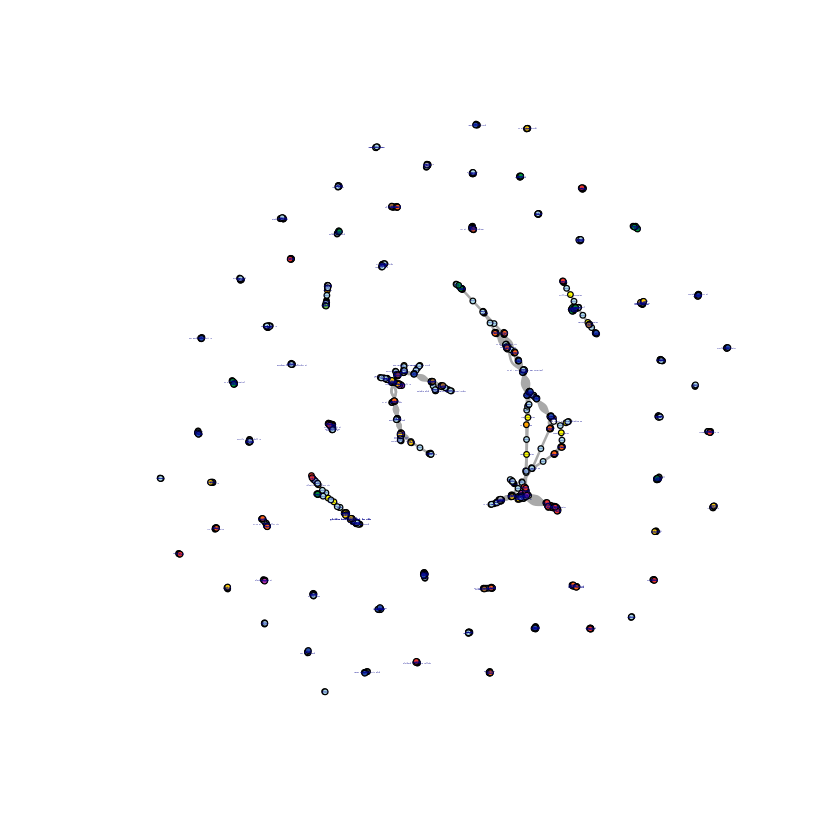

In [128]:
plot(updated_graph,vertex.size=2,vertex.label.cex=0.1,vertex.color=V(updated_graph)$color,edge.width=2)

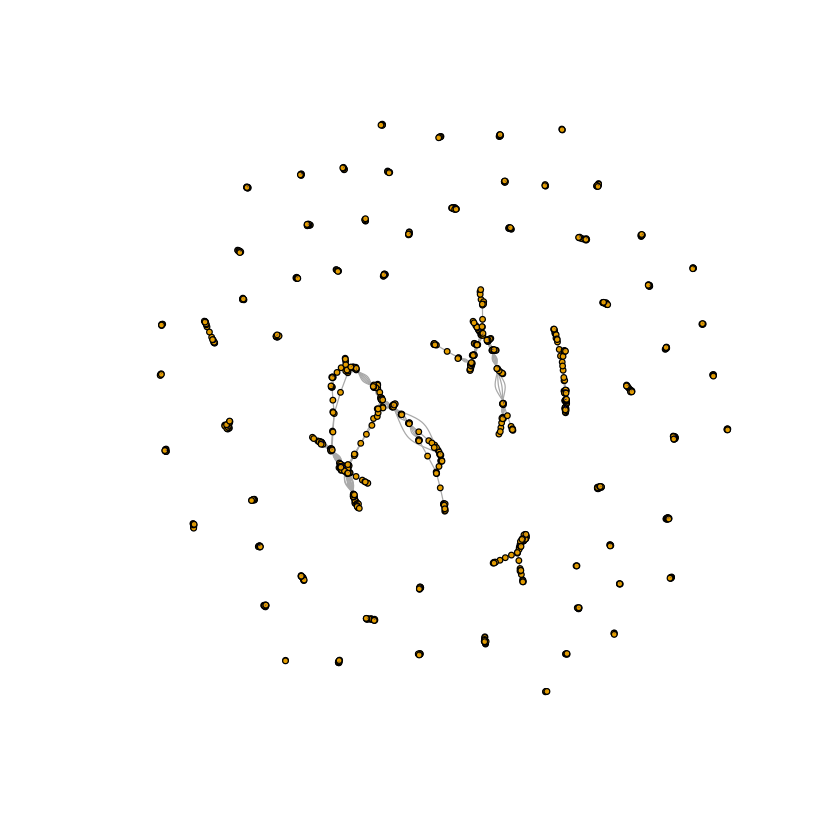

In [129]:
plot(h_new,vertex.size=2,vertex.label.cex=0.01)

In [133]:
p_gtfs <- p_gtfs[,c('platform_id','stop_id','line')]
p_gtfs <- p_gtfs[!duplicated(p_gtfs),]

In [137]:
p_gtfs[p_gtfs$stop_id =='101S',]

platform_id,stop_id,line
<chr>,<chr>,<chr>


In [140]:
ss[ss$from %in% p_gtfs$stop_id & ss$to %in% p_gtfs$stop_id,]

,from,to,line
,<chr>,<chr>,<chr>
41,123S,124S,1
42,124N,123N,1
49,127S,128S,1
50,128N,127N,1
69,137S,138S,1
70,138N,137N,1
76,120S,123S,2
77,123N,120N,2
78,123S,127S,2


In [134]:
e <- ss %>% dplyr::select(from,to,line) %>% 
        left_join(p_gtfs[,c('platform_id','stop_id','line')], by=c("from" = "stop_id", "line" = "line")) %>% 
        left_join(p_gtfs[,c('platform_id','stop_id','line')], by=c("to" = "stop_id", "line" = "line"))

In [136]:
head(ss)

from,to,line
<chr>,<chr>,<chr>
101S,103S,1
103N,101N,1
103S,104S,1
104N,103N,1
104S,106S,1
106N,104N,1


In [135]:
dim(e)

[1] 1697    5

In [95]:
colnames(e)[4:5] <- c('pid_from','pid_to')

In [99]:
e <- e[!is.na(e$pid_from) & !is.na(e$pid_to),]

In [115]:
length(unique(c(e$pid_from,e$pid_to)))

[1] 82

In [116]:
length(unique(c(e$from,e$to)))

[1] 90

In [101]:
length(unique(p_gtfs$platform_id))

[1] 170

In [104]:
length(unique(V(h)$name[V(h)$node_type == 'Platform']))

[1] 173

In [112]:
sum(unique(ss$from) %in% unique(p_gtfs$stop_id))

[1] 192

In [109]:
length(unique(p_gtfs$stop_id))

[1] 202

In [114]:
e

,from,to,line,pid_from,pid_to
,<chr>,<chr>,<chr>,<chr>,<chr>
41,123S,124S,1,pid_47,pid_46
42,124N,123N,1,pid_45,pid_48
51,127S,128S,1,pid_125,pid_136
52,127S,128S,1,pid_145,pid_136
53,128N,127N,1,pid_138,pid_125
54,128N,127N,1,pid_138,pid_146
73,137S,138S,1,pid_66,pid_153
74,138N,137N,1,pid_154,pid_65
80,120S,123S,2,pid_55,pid_47
